In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv("datas.csv", index_col = 0)

In [6]:
df.head()

,cost,final_momentum,iter,learning_rate,min_gain,mom_switch_iter,momentum
0,1.115448,0.1,0.0,250.0,0.001,150.0,0.1
1,0.276184,0.1,10.0,250.0,0.001,150.0,0.1
2,0.217505,0.1,20.0,250.0,0.001,150.0,0.1
3,0.216910,0.1,30.0,250.0,0.001,150.0,0.1
4,0.216081,0.1,40.0,250.0,0.001,150.0,0.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 89999
Data columns (total 7 columns):
cost               90000 non-null float64
final_momentum     90000 non-null float64
iter               90000 non-null float64
learning_rate      90000 non-null float64
min_gain           90000 non-null float64
mom_switch_iter    90000 non-null float64
momentum           90000 non-null float64
dtypes: float64(7)
memory usage: 5.5 MB


In [34]:
df.mom_switch_iter.value_counts()

250.0    22500
150.0    22500
600.0    22500
400.0    22500
Name: mom_switch_iter, dtype: int64

# Evolution 

## Final Momentum

In [10]:
sub_df = df[( df["learning_rate"] == 500 )  & ( df["min_gain"] == 0.01 ) & ( df["momentum"] == 0.5 ) & ( df["mom_switch_iter"] == 250 )]

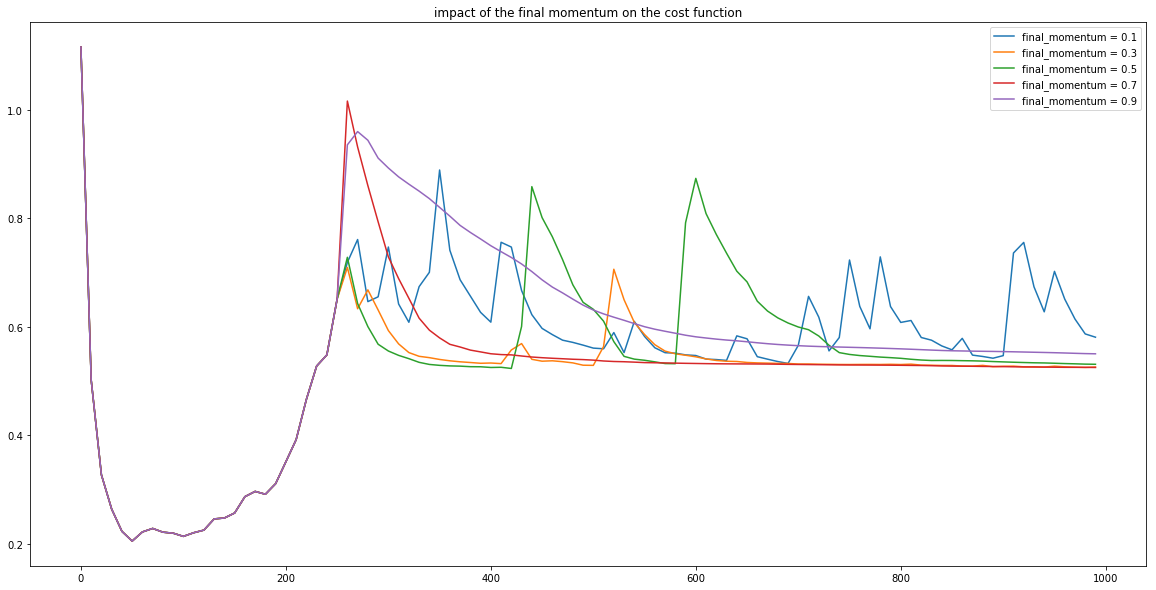

In [19]:
plt.figure(figsize=(20, 10))
plt.plot( sub_df[sub_df["final_momentum"] == 0.1]["iter"], sub_df[sub_df["final_momentum"] == 0.1]["cost"], label="final_momentum = 0.1" )
plt.plot( sub_df[sub_df["final_momentum"] == 0.3]["iter"], sub_df[sub_df["final_momentum"] == 0.3]["cost"], label="final_momentum = 0.3" )
plt.plot( sub_df[sub_df["final_momentum"] == 0.5]["iter"], sub_df[sub_df["final_momentum"] == 0.5]["cost"], label="final_momentum = 0.5" )
plt.plot( sub_df[sub_df["final_momentum"] == 0.7]["iter"], sub_df[sub_df["final_momentum"] == 0.7]["cost"], label="final_momentum = 0.7" )
plt.plot( sub_df[sub_df["final_momentum"] == 0.9]["iter"], sub_df[sub_df["final_momentum"] == 0.9]["cost"], label="final_momentum = 0.9" )
plt.title("impact of the final momentum on the cost function")
plt.legend()
plt.show()

A final momentum to small creates several bumps during the training. This can be understood as all moves are too important. A correct value seems to be 0.7 (1 bump quicky removed)

## learning_rate

In [22]:
sub_df = df[( df["final_momentum"] == 0.7 )  & ( df["min_gain"] == 0.01 ) & ( df["momentum"] == 0.5 ) & ( df["mom_switch_iter"] == 250 )]

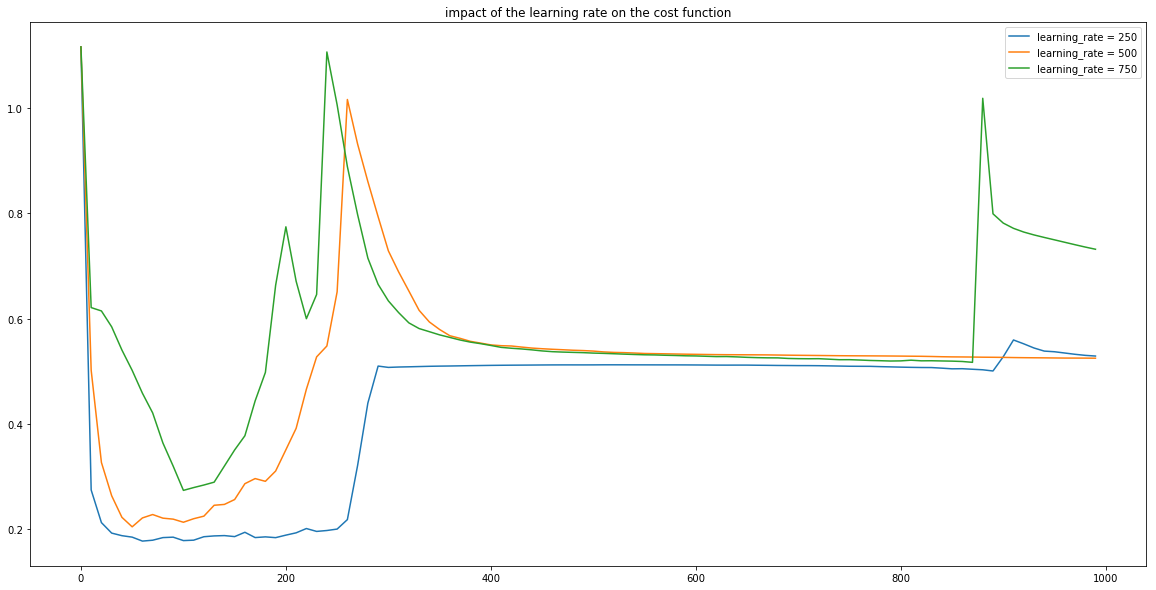

In [26]:
plt.figure(figsize=(20, 10))
plt.plot( sub_df[sub_df["learning_rate"] == 250]["iter"], sub_df[sub_df["learning_rate"] == 250]["cost"], label="learning_rate = 250" ) 
plt.plot( sub_df[sub_df["learning_rate"] == 500]["iter"], sub_df[sub_df["learning_rate"] == 500]["cost"], label="learning_rate = 500" )
plt.plot( sub_df[sub_df["learning_rate"] == 750]["iter"], sub_df[sub_df["learning_rate"] == 750]["cost"], label="learning_rate = 750" )
plt.title("impact of the learning rate on the cost function")
plt.legend()
plt.show()

A learning rate of 250 seems too small and 500 seems too big, a new simulation with steps within 300 - 450 would be required but we can assume that 400 should be ok

## min_gain 

In [28]:
sub_df = df[( df["final_momentum"] == 0.7 )  & ( df["learning_rate"] == 500 ) & ( df["momentum"] == 0.5 ) & ( df["mom_switch_iter"] == 250 )]

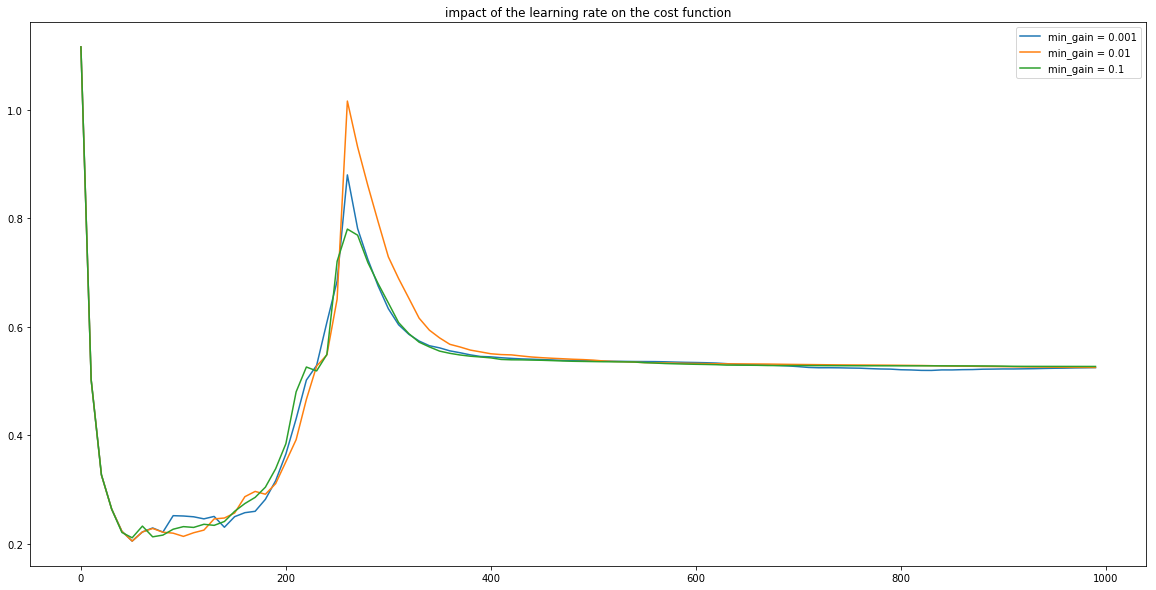

In [29]:
plt.figure(figsize=(20, 10))
plt.plot( sub_df[sub_df["min_gain"] == 0.001]["iter"], sub_df[sub_df["min_gain"] == 0.001]["cost"], label="min_gain = 0.001" ) 
plt.plot( sub_df[sub_df["min_gain"] == 0.01]["iter"], sub_df[sub_df["min_gain"] == 0.01]["cost"], label="min_gain = 0.01" )
plt.plot( sub_df[sub_df["min_gain"] == 0.1]["iter"], sub_df[sub_df["min_gain"] == 0.1]["cost"], label="min_gain = 0.1" )
plt.title("impact of the min_gain on the cost function")
plt.legend()
plt.show()

The min_gain has a very small impact, with 0.1, it seems a bit more noisy than 0.01 and 0.001 increase learning time after balance of learning rate

## momentum

In [41]:
sub_df = df[( df["learning_rate"] == 500 )  & ( df["min_gain"] == 0.01 ) & ( df["final_momentum"] == 0.7 ) & ( df["mom_switch_iter"] == 250 )]

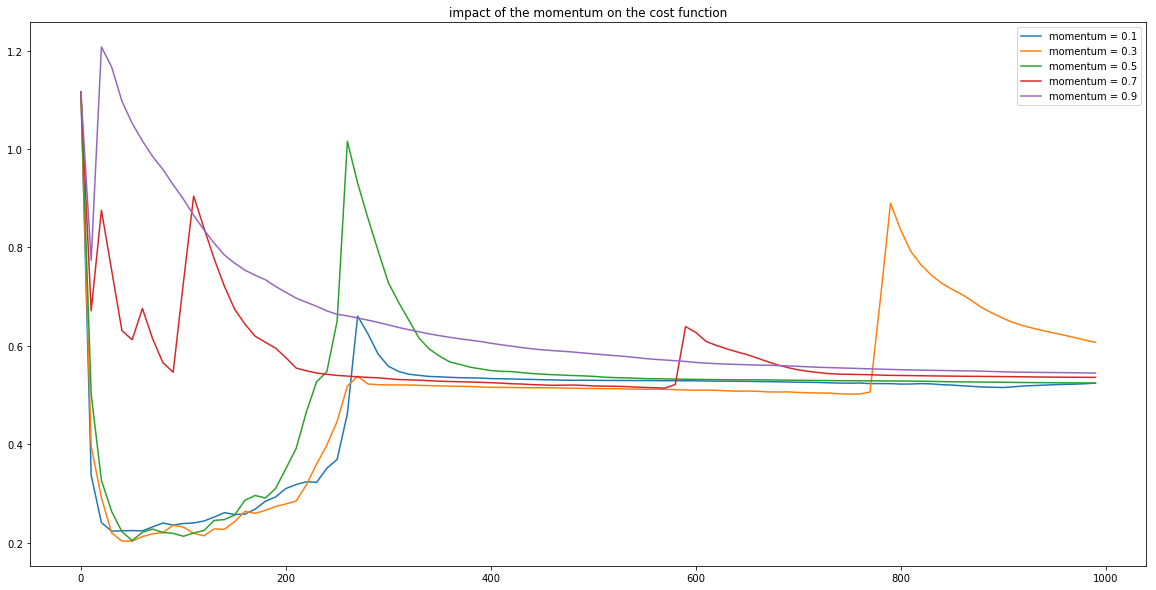

In [42]:
plt.figure(figsize=(20, 10))
plt.plot( sub_df[sub_df["momentum"] == 0.1]["iter"], sub_df[sub_df["momentum"] == 0.1]["cost"], label="momentum = 0.1" )
plt.plot( sub_df[sub_df["momentum"] == 0.3]["iter"], sub_df[sub_df["momentum"] == 0.3]["cost"], label="momentum = 0.3" )
plt.plot( sub_df[sub_df["momentum"] == 0.5]["iter"], sub_df[sub_df["momentum"] == 0.5]["cost"], label="momentum = 0.5" )
plt.plot( sub_df[sub_df["momentum"] == 0.7]["iter"], sub_df[sub_df["momentum"] == 0.7]["cost"], label="momentum = 0.7" )
plt.plot( sub_df[sub_df["momentum"] == 0.9]["iter"], sub_df[sub_df["momentum"] == 0.9]["cost"], label="momentum = 0.9" )
plt.title("impact of the momentum on the cost function")
plt.legend()
plt.show()

This parameter is strange... 
* 0.9 is clearly too high
* 0.7 seems good but has a inexpected bump at 570 iterations
* 0.5 has a big bump when there is a change of momentum but it's quite stable
* 0.3 has a perfect profile up to 700 iterations but the bump at 800 is strange as the change is at 250
* 0.1 is perfect, a small bump the rest is stable and has the lowest cost at 1000 iters

## mom_switch_iter

In [44]:
sub_df = df[( df["learning_rate"] == 500 )  & ( df["min_gain"] == 0.01 ) & ( df["momentum"] == 0.1 ) & ( df["final_momentum"] == 0.7 )]

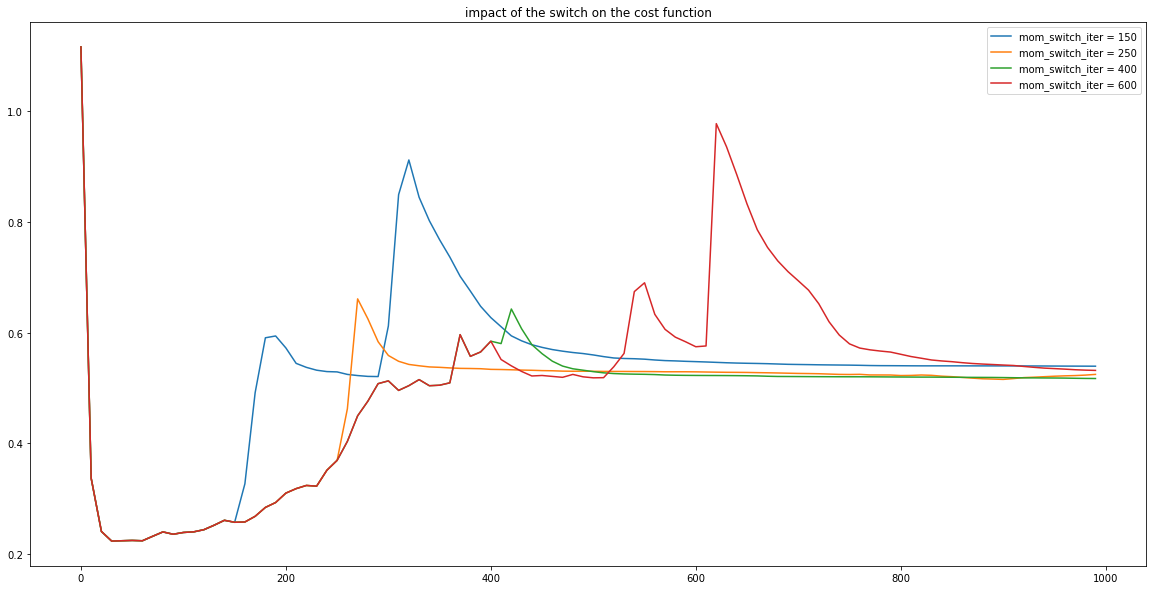

In [45]:
plt.figure(figsize=(20, 10))
plt.plot( sub_df[sub_df["mom_switch_iter"] == 150]["iter"], sub_df[sub_df["mom_switch_iter"] == 150]["cost"], label="mom_switch_iter = 150" )
plt.plot( sub_df[sub_df["mom_switch_iter"] == 250]["iter"], sub_df[sub_df["mom_switch_iter"] == 250]["cost"], label="mom_switch_iter = 250" )
plt.plot( sub_df[sub_df["mom_switch_iter"] == 400]["iter"], sub_df[sub_df["mom_switch_iter"] == 400]["cost"], label="mom_switch_iter = 400" )
plt.plot( sub_df[sub_df["mom_switch_iter"] == 600]["iter"], sub_df[sub_df["mom_switch_iter"] == 600]["cost"], label="mom_switch_iter = 600" )
plt.title("impact of the switch on the cost function")
plt.legend()
plt.show()

If the switch is too early, we have a second bump at around 2x switch. If we set it too late, depending on other parameter, we may need move iterations to finish the training.

# Best Setup

In [46]:
sub_df = df[( df["learning_rate"] == 500 )  & ( df["min_gain"] == 0.01 ) & ( df["momentum"] == 0.1 ) & ( df["final_momentum"] == 0.7 ) & ( df["mom_switch_iter"] == 250 )]

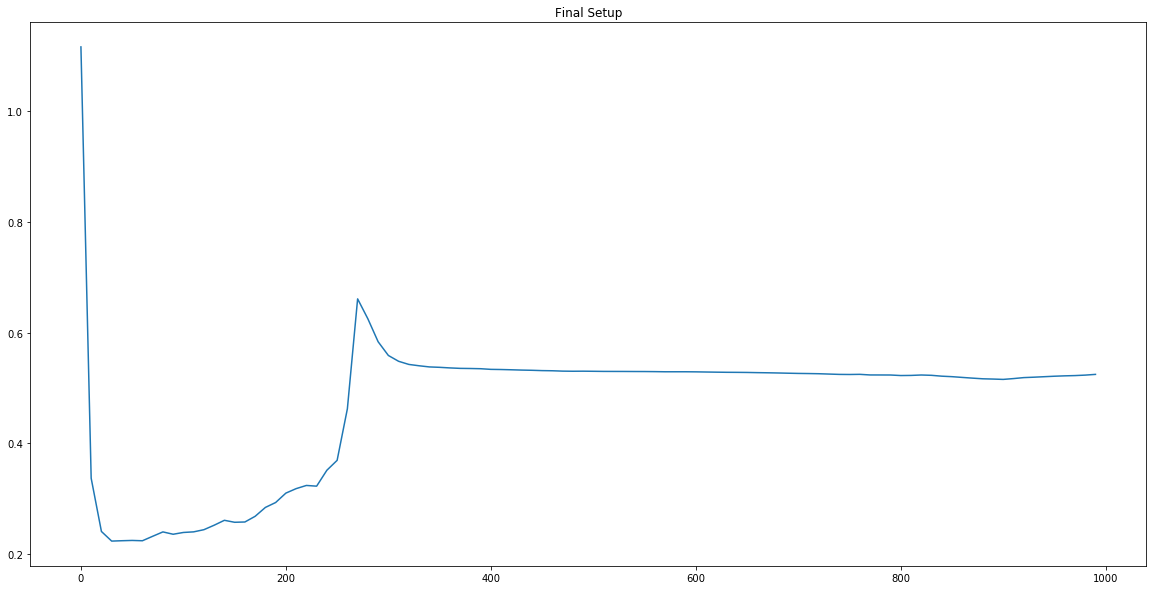

In [48]:
plt.figure(figsize=(20, 10))
plt.plot( sub_df["iter"], sub_df["cost"])
plt.title("Final Setup")
plt.show()